## [Logistic Regression] 
### Source Code Implement
<br>

#### Data: 2019.07.13
#### Author: 高鹏昺
#### E-mail: nbgao@126.com
#### Reference: [机器学习实战](https://github.com/apachecn/AiLearning), [numpy-ml](https://github.com/ddbourgin/numpy-ml)

## 1. Logistic Regression 实例

### 数据加载

In [34]:
import numpy as np

# 数据加载
def LoadDataSet():
    data = []
    label = []
    fr = open('./testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        data.append([1.0, float(lineArr[0]), float(lineArr[1])])
        label.append(int(lineArr[2]))
    return data, label

### 逻辑斯蒂函数

In [35]:
def Sigmoid(x):
    return 1.0/(1+np.exp(-x))

### 梯度下降法 (Gradient Descent)

In [36]:
def GradientDescent(data, label):
    dataMat = np.mat(data)
    labelMat = np.mat(label)
    m,n = np.shape(dataMat)
    alpha = 1e-3
    epoch_num = 1000
    weights = np.ones((n, 1))
    for i in range(epoch_num):
        y = Sigmoid(dataMat * weights)
        error = labelMat - y
        weights = weights + alpha * dataMat.T * error
    
    return weights

In [37]:
data, label = LoadDataSet()
GradientDescent(data, label)

matrix([[-2.98698407,  3.3517906 , -2.98698407, -2.98698407, -2.98698407,
          3.3517906 , -2.98698407,  3.3517906 , -2.98698407, -2.98698407,
          3.3517906 , -2.98698407,  3.3517906 , -2.98698407,  3.3517906 ,
          3.3517906 ,  3.3517906 ,  3.3517906 ,  3.3517906 ,  3.3517906 ,
          3.3517906 ,  3.3517906 , -2.98698407,  3.3517906 ,  3.3517906 ,
         -2.98698407, -2.98698407,  3.3517906 ,  3.3517906 , -2.98698407,
          3.3517906 ,  3.3517906 , -2.98698407,  3.3517906 ,  3.3517906 ,
         -2.98698407, -2.98698407, -2.98698407, -2.98698407, -2.98698407,
          3.3517906 ,  3.3517906 , -2.98698407,  3.3517906 ,  3.3517906 ,
         -2.98698407,  3.3517906 ,  3.3517906 , -2.98698407, -2.98698407,
         -2.98698407, -2.98698407, -2.98698407, -2.98698407,  3.3517906 ,
          3.3517906 , -2.98698407,  3.3517906 , -2.98698407,  3.3517906 ,
          3.3517906 ,  3.3517906 , -2.98698407, -2.98698407, -2.98698407,
          3.3517906 ,  3.3517906 , -2.

### 绘图函数

In [38]:
import matplotlib.pyplot as plt

# 绘制数据点和分割直线
def PlotLine(W):
    weights = W
    data, label = LoadDataSet()
    data = np.array(data)
    n = np.shape(data)[0]
    x1 = []; y1 = []
    x2 = []; y2 = []
    for i in range(n):
        if int(label[i])==1:
            x1.append(data[i,1])
            y1.append(data[i,2])
        else:
            x2.append(data[i,1])
            y2.append(data[i,2])
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.scatter(x1, y1, s=30, c='red', marker='s')
    ax.scatter(x2, y2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[1]*x - weights[0])/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1', size=16)
    plt.ylabel('X2', size=16)
    plt.grid()
    plt.show()

### SGD (Stochastic Gradient Descent)

In [39]:
def SGD(data, labels):
    m, n = np.shape(data)
    alpha = 1e-2
    weights = np.ones(n)
    for i in range(m):
        y = Sigmoid(sum(data[i]*weights))
        e = labels[i] - y
        weights = weights + alpha * e *data[i]
    return weights

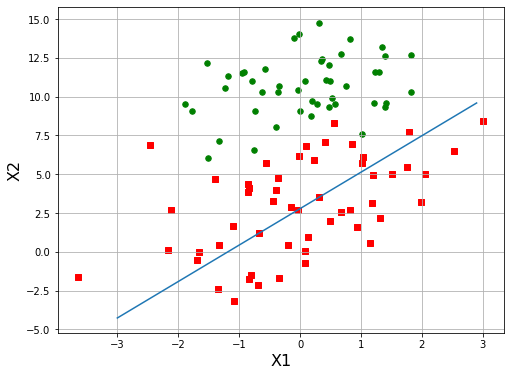

In [40]:
data, label = LoadDataSet()
weights = SGD(np.array(data), label)
PlotLine(weights)

### 改进的SGD算法

In [50]:
def SGD1(data, label, numIter=150):
    m, n = np.shape(data)
    weights = np.ones(n)
    bestWeights = np.ones(n)
    minError = 1.0
    errorList = []
    weights0 = []
    weights1 = []
    weights2 = []
    
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            y = Sigmoid(sum(data[randIndex]*weights))
            e = label[randIndex] - y
            weights = weights + alpha*e*data[randIndex]
        if j%1 == 0:
            print('Iter: %d, Error: %.10f' % (j, e))
            errorList.append(e)
            weights0.append(weights[0])
            weights1.append(weights[1])
            weights2.append(weights[2])
            if abs(e) < abs(minError) and e!=-0.00:
                minError = e
                bestWeights = weights
            #PlotLine(weights)
    
    plt.figure(figsize=(12,6))
    plt.plot(weights0, 'green')
    plt.plot(weights1, 'blue')
    plt.plot(weights2, 'orange')
    plt.plot(errorList, 'red')
    plt.grid()
    
    print('minError: %.10f' % minError)
#     return weights
    return bestWeights

Iter: 0, Error: -0.0001086615
Iter: 1, Error: 0.0377705585
Iter: 2, Error: -0.4013456520
Iter: 3, Error: 0.0000272779
Iter: 4, Error: -0.0170562196
Iter: 5, Error: 0.0000006773
Iter: 6, Error: 0.0177088667
Iter: 7, Error: 0.0001216365
Iter: 8, Error: 0.1099550841
Iter: 9, Error: 0.2426727328
Iter: 10, Error: 0.0035119203
Iter: 11, Error: -0.0000510395
Iter: 12, Error: -0.0001996753
Iter: 13, Error: -0.0011233115
Iter: 14, Error: -0.0006664054
Iter: 15, Error: 0.0000002660
Iter: 16, Error: -0.0016585755
Iter: 17, Error: -0.0002881585
Iter: 18, Error: -0.0006863864
Iter: 19, Error: -0.0004698615
Iter: 20, Error: -0.3567345037
Iter: 21, Error: -0.0036476143
Iter: 22, Error: 0.0000590250
Iter: 23, Error: -0.0000796302
Iter: 24, Error: -0.0902620785
Iter: 25, Error: -0.5349375363
Iter: 26, Error: 0.1643940789
Iter: 27, Error: -0.0000089412
Iter: 28, Error: 0.0000000219
Iter: 29, Error: -0.0069345743
Iter: 30, Error: 0.0000004506
Iter: 31, Error: -0.0000783552
Iter: 32, Error: -0.0168904557


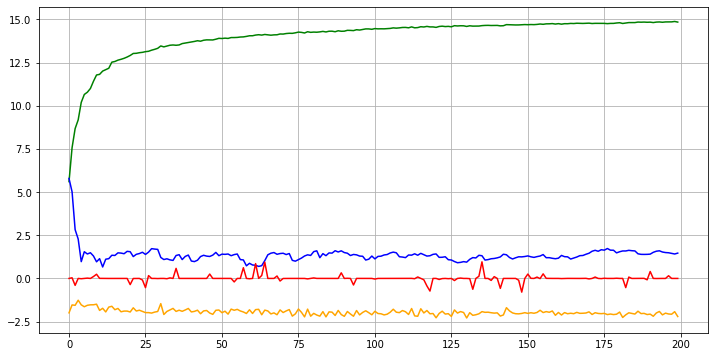

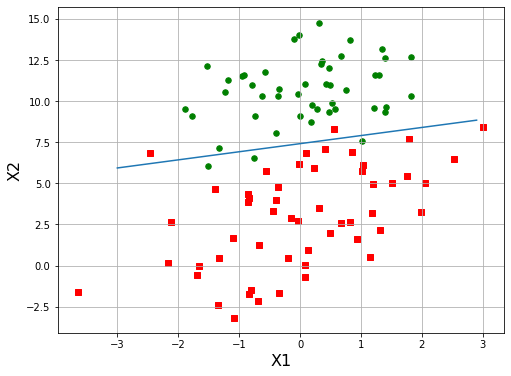

In [54]:
data, label = LoadDataSet()
weights = SGD1(np.array(data), label, 200)
PlotLine(weights)

## 2. Rogistic Regression 模型封装类

In [56]:
# Sigmoid函数(逻辑斯蒂函数)
def Sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [58]:
class LogisticRegression:
    '''
    weights: 直线参数
    penalty: 正则项(惩罚项)范数
    C: 惩罚项系数
    fit_intercepty: 是否有截距项
    '''
    def __init__(self, penalty="l1", C=0, fit_intercepty=True):
        self.weights = None
        self.C = C
        self.panalty = panalty
        self.fit_intercept = fit_intercepty
    
    # 拟合函数
    def fit(self, X, y, lr=0.01, eps=1e-7, maxIter=1e7):
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        
        l_old = np.inf
        self.weights = np.random.rand(X.shape[1])
        for iter in range(int(max_iter)):
            y_predict = Sigmoid(np.dot(X, self.weights))
            loss = self.logLikelihood(X, y, y_old)
            if l_old - loss < eps:
                return
            l_old = loss
            self.weights -= lr * self.grad(X, y, y_predict)
    
    # 对数似然函数
    def logLikehood(self, X, y, y_predict):
        n, m = X.shape
        loss = -np.log(y_predict[y==1]).sum() - np.log(1-y_predict[y==0]).sum()
        # 正则化项
        norm = 0
        if self.penalty=="l2":
            norm = 2
        else:
            norm = 1
        weights = self.weights
        C = self.C
        penalty = 0.5 * C * np.linalg.norm(weights, norm)
        # 返回结构风险损失
        return 1.0/n * (loss + penalty)
    
    # 对数似然函数的梯度
    def grad(self, X, y, y_predict):
        n, m = X.shape
        p = self.penalty
        weights = self.weights
        C = self.C
        dp = 0
        if self.penalty=="l2":
            dp = C*weights
        else:
            dp = C*np.sign(weights)
            
        return -1.0/n * (np.dot(y-y_predict, X) + dp)